## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pd.merge(study_results,mouse_metadata, how="left",on=["Mouse ID","Mouse ID"])

# Display the data table for preview


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [136]:
mousedata_complete

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
mousedata_complete = pd.merge(study_results,mouse_metadata, how="left",on=["Mouse ID","Mouse ID"])

In [13]:
# Checking the number of mice.
number_mice = mousedata_complete["Mouse ID"].nunique()

In [14]:
number_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

In [17]:
mouse_duplicate_id_timepoint = mousedata_complete.loc[mousedata_complete.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_g989= mousedata_complete.loc[mousedata_complete["Mouse ID"] == "g989", :]


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df= mousedata_complete[mousedata_complete['Mouse ID'].isin(mouse_duplicate_id_timepoint)==False]

In [23]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice_df= clean_mouse_df["Mouse ID"].nunique()


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

summary_mouse_mean = clean_mouse_df['Tumour Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
summary_mouse_median = clean_mouse_df['Tumour Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
summary_mouse_var = clean_mouse_df['Tumour Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
summary_mouse_std = clean_mouse_df['Tumour Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
summary_mouse_sem = clean_mouse_df['Tumour Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()

In [28]:
summary_statistic = pd.DataFrame({"Mean Tumour Volume":summary_mouse_mean,"Median Tumour Volume":summary_mouse_median, "Variance Tumour Volume":summary_mouse_var,"Std. Dev Tumour Volume":summary_mouse_std,"Std. Err. Tumour Volume":summary_mouse_sem})

In [138]:
summary_statistic

,Mean Tumour Volume,Median Tumour Volume,Variance Tumour Volume,Std. Dev Tumour Volume,Std. Err. Tumour Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mouse_df.groupby(['Drug Regimen'])[['Tumour Volume (mm3)']].agg(['summary_mouse_mean', 'summary_mouse_median', 'summary_mouse_var, 'summary_mouse_std', 'summary_mouse_sem])


SyntaxError: invalid syntax (698764349.py, line 4)

## Bar and Pie Charts

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count= clean_mouse_df["Drug Regimen"].value_counts()


Text(0.5, 1.0, 'Number of Mice per Treatment')

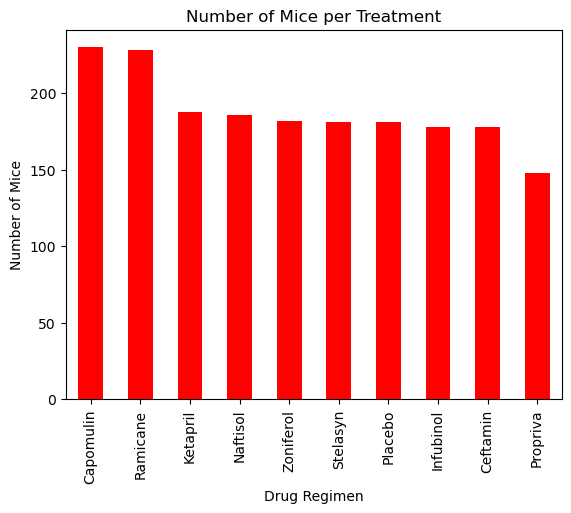

In [42]:
mice_count.plot.bar(color='r')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values



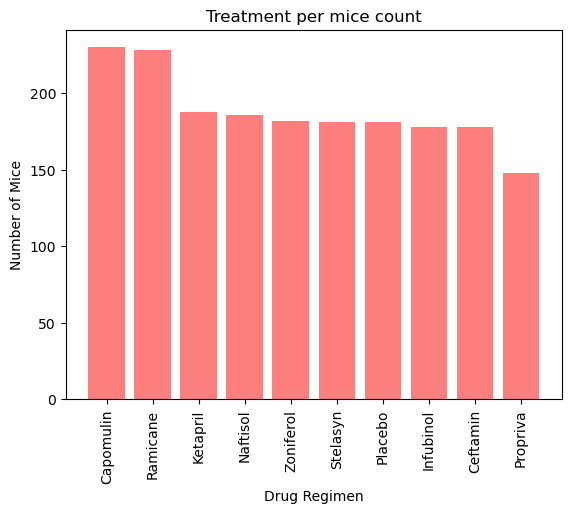

In [43]:
plt.bar(x_axis, y_axis, color ='r', alpha=0.5, align='center')
plt.title("Treatment per mice count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

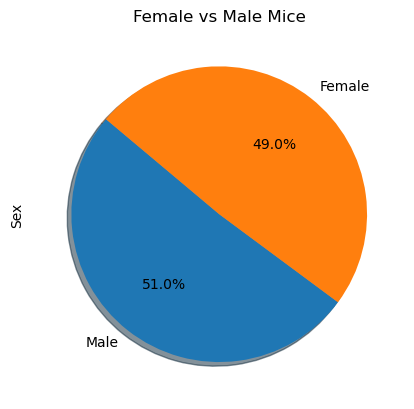

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mouse_pie= clean_mouse_df["Sex"].value_counts()
plt.title("Female vs Male Mice")
gender_mouse_pie.plot.pie(autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()



In [62]:
gender_mouse_pie

Male      958
Female    922
Name: Sex, dtype: int64

In [69]:
Mouse_population= 958+922
Male_mouse_population = 958
Female_mouse_population = 922

In [72]:
percent_of_male_mouse = (Male_mouse_population/Mouse_population) *100
percent_of_female_mouse = (Female_mouse_population/Mouse_population) *100

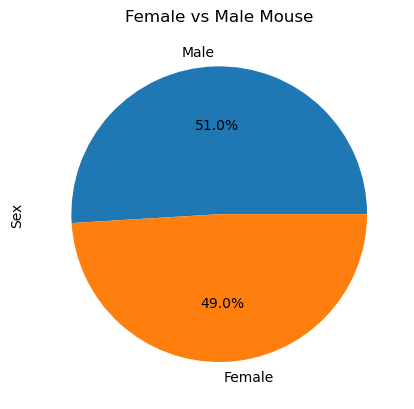

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [percent_of_female_mouse,percent_of_male_mouse]
plot = gender_mouse_pie.plot.pie(y = 'Total Count', autopct="%1.1f%%")
plt.title ('Female vs Male Mouse')
plt.ylabel('Sex')
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [79]:
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin", :]

In [81]:
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_volume = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_volume, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [82]:
capomulin_tumours= capomulin_merge["Tumour Volume (mm3)"]

quartiles= capomulin_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of capomulin tumors: {lowerq}")
print(f"The upper quartile of capomulin tumors: {upperq}")
print(f"The interquartile range of capomulin tumours: {iqr}")
print(f"The median of capomulin tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capomulin tumors: 32.37735684
The upper quartile of capomulin tumors: 40.1592203
The interquartile range of capomulin tumours: 7.781863460000004
The median of capomulin tumours: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [83]:
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_volume = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_volume, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [84]:
ramicane_tumours= ramicane_merge["Tumour Volume (mm3)"]

quartiles= ramicane_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of ramicane tumors: {lowerq}")
print(f"The upper quartile of ramicane tumors: {upperq}")
print(f"The interquartile range of ramicane tumours: {iqr}")
print(f"The median of ramicane tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ramicane tumors: 31.56046955
The upper quartile of ramicane tumors: 40.65900627
The interquartile range of ramicane tumours: 9.098536719999998
The median of ramicane tumours: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [85]:
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_volume = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_volume, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [86]:
infubinol_tumours= infubinol_merge["Tumour Volume (mm3)"]

quartiles= infubinol_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of infubinol tumors: {lowerq}")
print(f"The upper quartile of infubinol tumors: {upperq}")
print(f"The interquartile range of infubinol tumours: {iqr}")
print(f"The median of infubinol tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of infubinol tumors: 54.04860769
The upper quartile of infubinol tumors: 65.52574285
The interquartile range of infubinol tumours: 11.477135160000003
The median of infubinol tumours: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [87]:
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_volume = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_volume, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [88]:
ceftamin_tumours= ceftamin_merge["Tumour Volume (mm3)"]

quartiles= ceftamin_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of ceftamin tumors: {lowerq}")
print(f"The upper quartile of ceftamin tumors: {upperq}")
print(f"The interquartile range of ceftamin tumours: {iqr}")
print(f"The median of ceftamin tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ceftamin tumors: 48.72207785
The upper quartile of ceftamin tumors: 64.29983003
The interquartile range of ceftamin tumours: 15.577752179999997
The median of ceftamin tumours: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

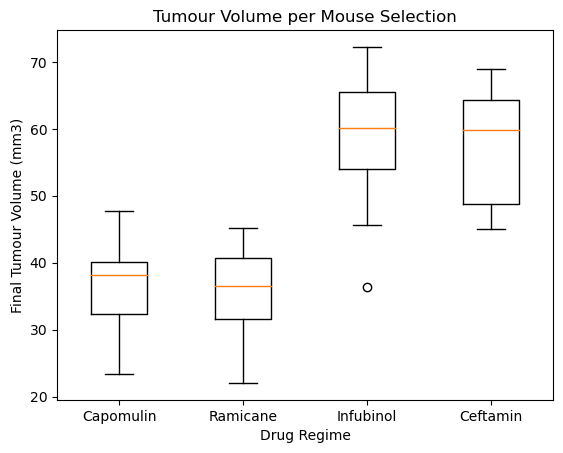

In [90]:
final_tumour_values =[capomulin_tumours, ramicane_tumours, infubinol_tumours, ceftamin_tumours]
Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1,ax1 = plt.subplots()
ax1.set_title('Tumour Volume per Mouse Selection')
ax1.set_ylabel('Final Tumour Volume (mm3)')
ax1.set_xlabel('Drug Regime')
ax1.boxplot(final_tumour_values, labels= Drug_Regimen)
plt.show()

In [107]:
drug_regimen_list = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]
drugs = mousedata_complete[mousedata_complete["Drug Regimen"].isin(drug_regimen_list)]
drugs.head()


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [109]:
lasttimepoint_drugs = drugs.groupby(["Drug Regimen","Mouse ID"]).agg(tumoursize=("Tumour Volume (mm3)", lambda x: x.iloc[-1]))

lasttimepoint_drugs = lasttimepoint_drugs.stack(level=0).unstack(level=0)
for drug in drug_regimen_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [112]:
treatment = 0
for drug in drug_regimen_list:
    quartiles = lasttimepoint_drugs[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

In [117]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


Text(0, 0.5, 'Tumour Volume (mm3)')

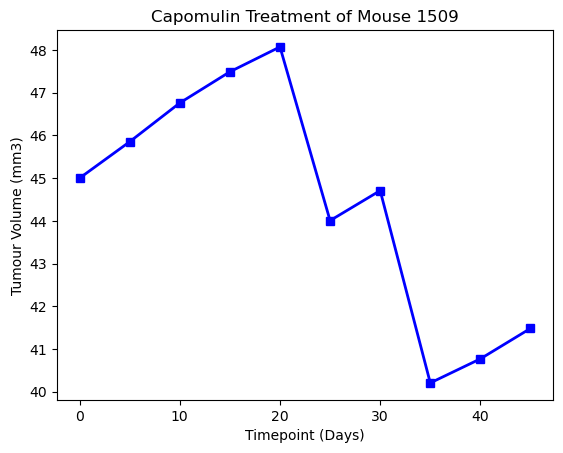

In [124]:
capomulin_line_df= capomulin_df.loc[capomulin_df["Mouse ID"] =="l509",:]
capomulin_line_df.head()
x_axis= capomulin_line_df["Timepoint"]
y_axis = capomulin_line_df["Tumour Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin Treatment of Mouse 1509')
plt.plot(x_axis,y_axis,linewidth=2, marker="s",color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel ('Tumour Volume (mm3)')


Text(0, 0.5, 'Averag Tumour Volume (mm3)')

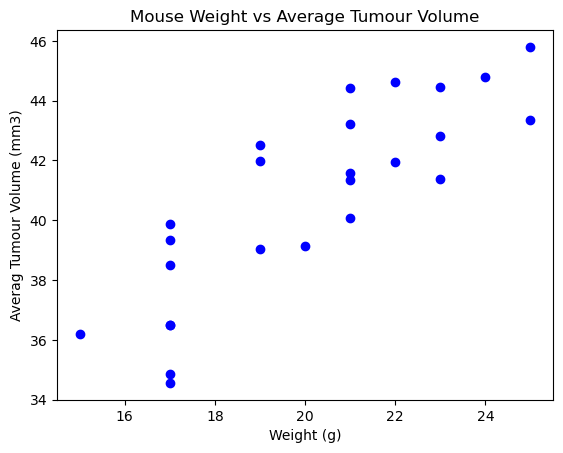

In [137]:
fig1, ax1 = plt.subplots()
average_capomulin_vol = capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(average_capomulin_vol['Weight (g)'],average_capomulin_vol['Tumour Volume (mm3)'], color="blue")
plt.title('Mouse Weight vs Average Tumour Volume')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumour Volume (mm3)')

In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen


In [130]:
from scipy.stats import linregress

In [126]:
correlation = st.pearsonr(average_capomulin_vol['Weight (g)'],average_capomulin_vol['Tumour Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumour volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumour volume is 0.84


The r-squared is: 0.709


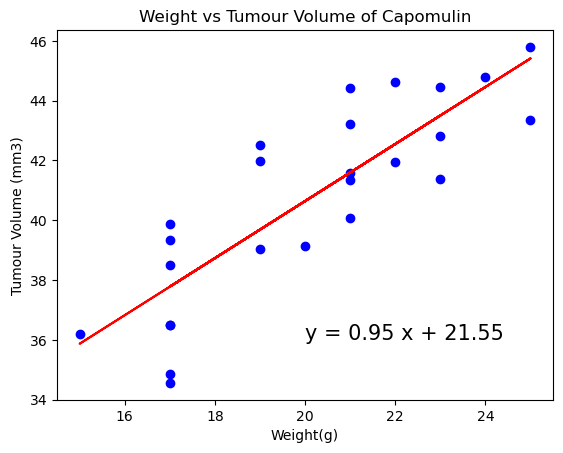

In [135]:
(slope, intercept, rvalue, pvalue,stderr)= linregress(average_capomulin_vol["Weight (g)"],average_capomulin_vol["Tumour Volume (mm3)"])

regress_values=average_capomulin_vol["Weight (g)"]*slope+intercept
line_equation= f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(average_capomulin_vol["Weight (g)"], average_capomulin_vol["Tumour Volume (mm3)"], color='b')
plt.plot(average_capomulin_vol["Weight (g)"], regress_values,color='red') 
plt.annotate(line_equation,(20,36), fontsize=15)
plt.xlabel("Weight(g)")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Weight vs Tumour Volume of Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
